In [1]:
from random import randint, choice
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
import colorsys as col

def correctify(a):
    if a>1:
        return 1
    elif a<0:
        return 0
    else:
        return a

### Functions for Final Product

In [2]:
def choose_haircol(skincol):
    if skincol=='none':
        l_max=500
    else:
        l_max=int(skincol[1]*500)+20
    l=randint(0,l_max)/500
    s_max=correctify(abs(0.6-l)*10)
    s=randint(0,int(500*s_max))/500
    sat_boost=abs(0.4-l)*0.7*randint(0,3)/3
    s+=sat_boost
    h_min=1/18-abs(0.6-l)**2+sqrt(s)/(abs(0.8-l)*20)
    if h_min>18/360:
        h_min=18/360
    h_max=0.14+abs(0.6-l)**2-sqrt(s)/(abs(0.4-l)*18)
    if h_max<23/360:
        h_max=23/360
    h=randint(int(500*h_min),int(500*h_max))/500
    color=(col.hls_to_rgb(h,l,correctify(s)))

    seg=[]
    sog=[]
    for y in [0,1,2]:
        a=color[y]+0.1+(randint(0,25)-15)/255
        seg.append(correctify(a))
    for y in [0,1,2]:
        a=color[y]-0.1+(randint(0,30)-15)/255
        sog.append(correctify(a))

    light=[seg for x in range(6)]
    dark=[sog for x in range(6)]
    midsec=[color for x in range(6)]
    block=light+midsec+midsec+midsec+midsec+dark

    block=np.reshape(block,(6,6,3))
    plt.imshow(block)
    plt.show
    return [h,l,s]

def choose_age(n,skew):
    age=n
    if skew=='neg':
        m=-0.1
    else:
        m=0.1
    while randint(0,3)!=2:
        age+=randint(0,20)*(age/35)*m
    yrs=int(age)
    mns=int(12*(age-yrs))
    print(str(yrs)+' years and '+str(mns)+' months old')
    return age

def choose_biosex():
    return choice(['m', 'f'])

def choose_height(age,sex):
    if sex=='f':
        height_dic={0:19.5, 1:27, 2:34, 3:37.5, 4:40, 5:42.5, 6:45, 7:47.5, 8:50,
                    9: 52, 10:54, 11:56.5, 12:59, 13:61, 14:63, 15:64, 16:64, 17:64.5} #heights by age, levels off at 64.5 in
        default=64.5
    else:
        height_dic={0:19.5, 1:29.5, 2:34.5, 3:38, 4:40, 5:42.5, 6:45, 7:47.5, 8:50,
                    9: 52.5, 10:55, 11:57, 12:59, 13:61.5, 14:64, 15:66, 16:68, 17:68.5, 18:69, 19:69.5} #levels off at 69.5 in
        default=69.5
    inp=int(round(age,0))
    start=height_dic.get(inp,default)
    if randint(0,1)==1:
        m=-0.04
    else:
        m=0.04
    while randint(0,15)>3:
        start+=randint(0,40)*m
    height=start
    feet=int(height/12)
    ins=round(height-12*feet,3)
    print(str(feet)+' ft and '+str(ins)+' inches')
    return height

def choose_skincol(haircol):
    if haircol=='none':
        l_min=50
    else:
        l_min=int(400*haircol[1])+20
    h=0.014+randint(0,26)/720
    s=randint(25,62)/100
    l=randint(l_min,490)/1000+randint(l_min,490)/1000
    if abs(0.5-l)<0.2 and s>=0.5:
        print(s)
        s-=(0.018*(s)*(1/(0.04+abs(0.5-l))))
        if s<0:
            s=0
    if l*(1-s)<0.8:
        h+=0.02
    if l>0.8:
        print(s)
        min=int(4*l-0.9)
        s+=(randint(min,10)/10)*l*0.3
    color=col.hls_to_rgb(h,l,s)

    bookend=[color for x in range(6)]
    block=bookend+bookend+bookend+bookend+bookend+bookend

    block=np.reshape(block,(6,6,3))
    plt.imshow(block)
    plt.show
    return ([h,l,s])

def choose_weight(age,sex):
    if sex=='f':
        weight_dic={0:7.7, 1:16.13, 2:27, 3:31.6, 4:34, 5:39.5, 6:46, 7:52, 8:58, 
                    9:65, 10:72, 11:83.5, 12:95, 13:102, 14:109, 15:114, 16:119, 17:122, 18:125, 19:128, 20:130}
        if age>20 and age<=40:
            default=110+age
        elif age>40 and age <=55:
            default=150+(age-40)/3
        elif age>55 and age<=60:
            default=155
        else:
            default=150-0.7*age
    else:
        weight_dic={0:7.7, 1:17.5, 2:28, 3:32.5, 4:36, 5:41.1, 6:46, 7:51, 8:56,
                    9:62, 10:68, 11:79, 12:90, 13:101, 14:112, 15:123, 16:134, 17:139, 18:144, 19:147.5, 20:151}
        if age>20 and age<=30:
            default=151+2.1*(age-20)
        elif age>30 and age<=40:
            default=172+0.8*(age-30)
        elif age>40 and age <=50:
            default=180+0.2*(age-40)
        elif age>50 and age<=65:
            default=182-0.2*(age-50)
        else:
            default=180-0.3*(age-65)
    inp=int(round(age,0))
    start=weight_dic.get(inp,default)
    if randint(0,1)==1:
        m=-0.04
    else:
        m=0.04
    if age<12:
        m*=age/10
    while randint(0,15)<14:
        start+=randint(0,40)*m
    weight=start
    lbs=int(weight)
    ounces=round(16*(weight-lbs),2)
    print(str(lbs)+' lbs and '+str(ounces)+' oz')
    return weight

#### "Workspace"

<function matplotlib.pyplot.show(*args, **kw)>

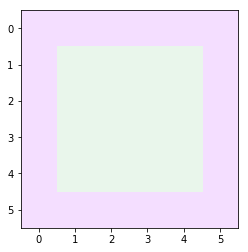

In [3]:
color=col.hls_to_rgb(randint(0,255)/255,randint(0,255)/255,randint(0,255)/255)
seg=[]
for y in [0,1,2]:
    a=color[y]+(randint(0,54)-27)/255
    seg.append(correctify(a))

bookend=[seg for x in range(6)]
midsec=[seg]+[color for x in range(4)]+[seg]
block=bookend+midsec+midsec+midsec+midsec+bookend

block=np.reshape(block,(6,6,3))
plt.imshow(block)
plt.show

19 years and 9 months old
m
5 ft and 9.5 inches
181 lbs and 0.64 oz
BMI = 26.349
overweight


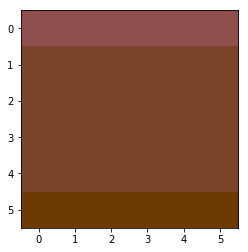

In [26]:
age=choose_age(20,choice(['neg','pos']))
sex=choose_biosex()
print(sex)
height=(choose_height(age,sex))
weight=(choose_weight(age,sex))
hair = choose_haircol('none')
describe_body(height,weight)

In [5]:
def describe_body(height, weight):
    bmi=703*weight/height**2
    print('BMI = '+str(round(bmi,3)))
    if bmi<18.5:
        print('underweight')
    elif bmi<25:
        print('normal')
    elif bmi<30:
        print('overweight')
    else:
        print('obese')

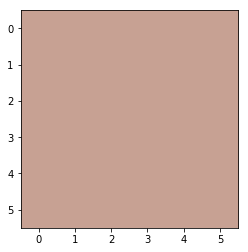

In [10]:
skin=choose_skincol(hair)